In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
account=pd.read_excel("account_data.xlsx")
card=pd.read_csv("card_cleaned.csv")
client=pd.read_excel("client_data.xlsx")
disposition=pd.read_csv("disposition.csv")
demographic=pd.read_csv("district_cleaned.csv")
loan=pd.read_csv("loan_cleaned.csv")
order=pd.read_csv("Orders_cleaned.csv")
transaction=pd.read_csv("transaction1.csv")

In [3]:
import urllib.parse

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df_mergedx =client.merge(disposition, on='client_id', how='inner') \
                 .merge(card, on='disp_id', how='inner')
                

In [6]:
df_mergedx

,client_id,birth_date,district_id,Gender,disp_id,account_id,type_x,card_id,type_y,issued
0,9,1935-10-16,60,Male,9,7,OWNER,1,gold,1998-10-16
1,19,1942-12-28,47,Male,19,14,OWNER,2,classic,1998-03-13
2,41,1968-08-27,22,Male,41,33,OWNER,3,gold,1995-09-03
3,42,1935-08-17,68,Male,42,34,OWNER,4,classic,1998-11-26
4,51,1979-12-02,36,Female,51,43,OWNER,5,junior,1995-04-24
...,...,...,...,...,...,...,...,...,...,...
887,13620,1970-07-26,16,Male,13312,11079,OWNER,1230,classic,1998-03-08
888,13690,1963-05-16,70,Male,13382,11138,OWNER,1233,classic,1996-07-06
889,13694,1976-01-20,1,Female,13386,11141,OWNER,1234,classic,1997-11-28
890,13750,1980-11-13,12,Female,13442,11186,OWNER,1239,junior,1998-02-02


In [7]:
df_mergedx["issued"]=pd.to_datetime(df_mergedx["issued"])

In [8]:
df_mergedx["Age"]=round((df_mergedx["issued"]-df_mergedx["birth_date"]).dt.days/365,0)

In [16]:
df_mergedxxx = df_mergedx.merge(account,on="account_id",how="inner").merge(transaction,on="account_id",how="inner")

In [26]:
df_mergedxx=df_mergedxxx.merge(loan,on="account_id",how="inner")

In [27]:
df_mergedxx

,client_id,birth_date,district_id_x,Gender,disp_id,account_id,type_x,card_id,type_y,issued,Age,district_id_y,frequency,date_x,Unnamed: 0,trans_id,date_y,type,operation,amount_x,balance,k_symbol,bank,account,loan_id,date,amount_y,duration,payments,status
0,116,1942-01-28,74,Male,116,97,OWNER,16,classic,1998-06-23,56.0,74,Monthly Issuance,1996-05-05,314432,29886,1996-05-05,Credit,Credit_In_Cash,900.0,900.0,Unknown,Unknown,Unknown,4986,1997-08-10,102876,12,8573.0,No Problem
1,116,1942-01-28,74,Male,116,97,OWNER,16,classic,1998-06-23,56.0,74,Monthly Issuance,1996-05-05,320161,29891,1996-05-14,Credit,Credit_In_Cash,17928.0,18828.0,Unknown,Unknown,Unknown,4986,1997-08-10,102876,12,8573.0,No Problem
2,116,1942-01-28,74,Male,116,97,OWNER,16,classic,1998-06-23,56.0,74,Monthly Issuance,1996-05-05,327563,3533692,1996-05-31,Credit,Unknown,45.6,18873.5,Interest_Credited,Unknown,Unknown,4986,1997-08-10,102876,12,8573.0,No Problem
3,116,1942-01-28,74,Male,116,97,OWNER,16,classic,1998-06-23,56.0,74,Monthly Issuance,1996-05-05,328656,30161,1996-06-04,Credit,Credit_In_Cash,4500.0,23373.5,Unknown,Unknown,Unknown,4986,1997-08-10,102876,12,8573.0,No Problem
4,116,1942-01-28,74,Male,116,97,OWNER,16,classic,1998-06-23,56.0,74,Monthly Issuance,1996-05-05,335233,29892,1996-06-14,Credit,Credit_In_Cash,26892.0,50265.6,Unknown,Unknown,Unknown,4986,1997-08-10,102876,12,8573.0,No Problem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47122,13968,1968-04-13,61,Male,13660,11359,OWNER,1247,classic,1995-06-13,27.0,61,Monthly Issuance,1994-10-01,1041775,3423093,1998-12-11,Debit,Remittance_To,254.0,38296.8,Unknown,AB,90330576.0,7305,1996-08-06,54024,12,4502.0,No Problem
47123,13968,1968-04-13,61,Male,13660,11359,OWNER,1247,classic,1995-06-13,27.0,61,Monthly Issuance,1994-10-01,1041776,3423128,1998-12-11,Debit,Credit_Card_Withdrawal,1800.0,38550.8,Unknown,Unknown,0.0,7305,1996-08-06,54024,12,4502.0,No Problem
47124,13968,1968-04-13,61,Male,13660,11359,OWNER,1247,classic,1995-06-13,27.0,61,Monthly Issuance,1994-10-01,1045905,3422913,1998-12-14,Credit,Collection_From,40521.0,78817.8,Unknown,MN,87391823.0,7305,1996-08-06,54024,12,4502.0,No Problem
47125,13968,1968-04-13,61,Male,13660,11359,OWNER,1247,classic,1995-06-13,27.0,61,Monthly Issuance,1994-10-01,1049185,3422973,1998-12-21,Debit,Whithdrawal_In_Cash,3900.0,74917.8,Unknown,Unknown,0.0,7305,1996-08-06,54024,12,4502.0,No Problem


<Axes: xlabel='client_id'>

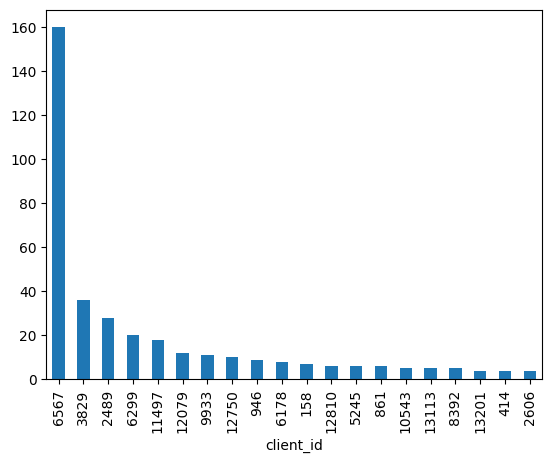

In [43]:
df_mergedxx[(df_mergedxx["balance"]<(df_mergedxx["payments"]*1.5))]["client_id"].value_counts().head(20).plot(kind="bar")

<Axes: xlabel='district_id_x'>

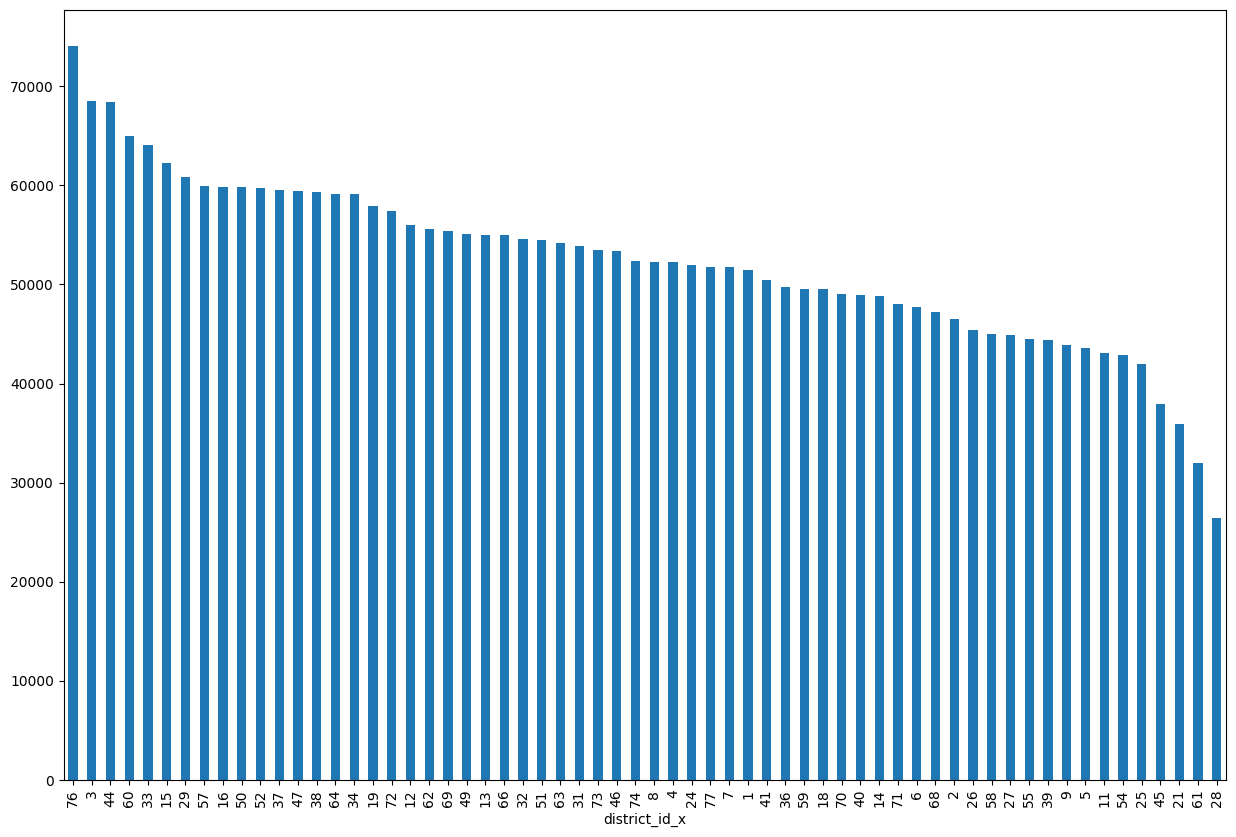

In [47]:
plt.figure(figsize=(15, 10))
df_mergedxx.groupby("district_id_x")["balance"].median().sort_values(ascending=False).plot(kind="bar")


In [24]:
df_mergedxxx[df_mergedxxx["date_y"]>df_mergedxxx["date_x"]]

,client_id,birth_date,district_id_x,Gender,disp_id,account_id,type_x,card_id,type_y,issued,Age,district_id_y,frequency,date_x,Unnamed: 0,trans_id,date_y,type,operation,amount,balance,k_symbol,bank,account
1,9,1935-10-16,60,Male,9,7,OWNER,1,gold,1998-10-16,63.0,60,Monthly Issuance,1996-11-24,431701,1671,1996-12-07,Credit,Credit_In_Cash,33975.0,34875.0,Unknown,Unknown,Unknown
2,9,1935-10-16,60,Male,9,7,OWNER,1,gold,1998-10-16,63.0,60,Monthly Issuance,1996-11-24,441347,1800,1996-12-24,Debit,Whithdrawal_In_Cash,6600.0,28275.0,Unknown,Unknown,Unknown
3,9,1935-10-16,60,Male,9,7,OWNER,1,gold,1998-10-16,63.0,60,Monthly Issuance,1996-11-24,449360,3530663,1996-12-31,Credit,Unknown,30.4,28305.4,Interest_Credited,Unknown,Unknown
4,9,1935-10-16,60,Male,9,7,OWNER,1,gold,1998-10-16,63.0,60,Monthly Issuance,1996-11-24,455857,1672,1997-01-07,Credit,Credit_In_Cash,22650.0,50955.4,Unknown,Unknown,Unknown
5,9,1935-10-16,60,Male,9,7,OWNER,1,gold,1998-10-16,63.0,60,Monthly Issuance,1996-11-24,471494,1801,1997-01-23,Debit,Whithdrawal_In_Cash,12300.0,38655.4,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221933,13968,1968-04-13,61,Male,13660,11359,OWNER,1247,classic,1995-06-13,27.0,61,Monthly Issuance,1994-10-01,1041775,3423093,1998-12-11,Debit,Remittance_To,254.0,38296.8,Unknown,AB,90330576.0
221934,13968,1968-04-13,61,Male,13660,11359,OWNER,1247,classic,1995-06-13,27.0,61,Monthly Issuance,1994-10-01,1041776,3423128,1998-12-11,Debit,Credit_Card_Withdrawal,1800.0,38550.8,Unknown,Unknown,0.0
221935,13968,1968-04-13,61,Male,13660,11359,OWNER,1247,classic,1995-06-13,27.0,61,Monthly Issuance,1994-10-01,1045905,3422913,1998-12-14,Credit,Collection_From,40521.0,78817.8,Unknown,MN,87391823.0
221936,13968,1968-04-13,61,Male,13660,11359,OWNER,1247,classic,1995-06-13,27.0,61,Monthly Issuance,1994-10-01,1049185,3422973,1998-12-21,Debit,Whithdrawal_In_Cash,3900.0,74917.8,Unknown,Unknown,0.0


In [32]:
bins = [0, 25, 55, float('inf')]
labels = ['young', 'middle_aged', 'old']

# Create a new column with the categorized age groups
df_mergedxx['age_group'] = pd.cut(df_mergedxx['Age'], bins=bins, labels=labels, right=False)

In [33]:
df_mergedxx

,client_id,birth_date,district_id_x,Gender,disp_id,account_id,type_x,card_id,type_y,issued,Age,district_id_y,frequency,date_x,Unnamed: 0,trans_id,date_y,type,operation,amount_x,balance,k_symbol,bank,account,loan_id,date,amount_y,duration,payments,status,age_group
0,116,1942-01-28,74,Male,116,97,OWNER,16,classic,1998-06-23,56.0,74,Monthly Issuance,1996-05-05,314432,29886,1996-05-05,Credit,Credit_In_Cash,900.0,900.0,Unknown,Unknown,Unknown,4986,1997-08-10,102876,12,8573.0,No Problem,old
1,116,1942-01-28,74,Male,116,97,OWNER,16,classic,1998-06-23,56.0,74,Monthly Issuance,1996-05-05,320161,29891,1996-05-14,Credit,Credit_In_Cash,17928.0,18828.0,Unknown,Unknown,Unknown,4986,1997-08-10,102876,12,8573.0,No Problem,old
2,116,1942-01-28,74,Male,116,97,OWNER,16,classic,1998-06-23,56.0,74,Monthly Issuance,1996-05-05,327563,3533692,1996-05-31,Credit,Unknown,45.6,18873.5,Interest_Credited,Unknown,Unknown,4986,1997-08-10,102876,12,8573.0,No Problem,old
3,116,1942-01-28,74,Male,116,97,OWNER,16,classic,1998-06-23,56.0,74,Monthly Issuance,1996-05-05,328656,30161,1996-06-04,Credit,Credit_In_Cash,4500.0,23373.5,Unknown,Unknown,Unknown,4986,1997-08-10,102876,12,8573.0,No Problem,old
4,116,1942-01-28,74,Male,116,97,OWNER,16,classic,1998-06-23,56.0,74,Monthly Issuance,1996-05-05,335233,29892,1996-06-14,Credit,Credit_In_Cash,26892.0,50265.6,Unknown,Unknown,Unknown,4986,1997-08-10,102876,12,8573.0,No Problem,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47122,13968,1968-04-13,61,Male,13660,11359,OWNER,1247,classic,1995-06-13,27.0,61,Monthly Issuance,1994-10-01,1041775,3423093,1998-12-11,Debit,Remittance_To,254.0,38296.8,Unknown,AB,90330576.0,7305,1996-08-06,54024,12,4502.0,No Problem,middle_aged
47123,13968,1968-04-13,61,Male,13660,11359,OWNER,1247,classic,1995-06-13,27.0,61,Monthly Issuance,1994-10-01,1041776,3423128,1998-12-11,Debit,Credit_Card_Withdrawal,1800.0,38550.8,Unknown,Unknown,0.0,7305,1996-08-06,54024,12,4502.0,No Problem,middle_aged
47124,13968,1968-04-13,61,Male,13660,11359,OWNER,1247,classic,1995-06-13,27.0,61,Monthly Issuance,1994-10-01,1045905,3422913,1998-12-14,Credit,Collection_From,40521.0,78817.8,Unknown,MN,87391823.0,7305,1996-08-06,54024,12,4502.0,No Problem,middle_aged
47125,13968,1968-04-13,61,Male,13660,11359,OWNER,1247,classic,1995-06-13,27.0,61,Monthly Issuance,1994-10-01,1049185,3422973,1998-12-21,Debit,Whithdrawal_In_Cash,3900.0,74917.8,Unknown,Unknown,0.0,7305,1996-08-06,54024,12,4502.0,No Problem,middle_aged


<Axes: xlabel='type_y', ylabel='age_group'>

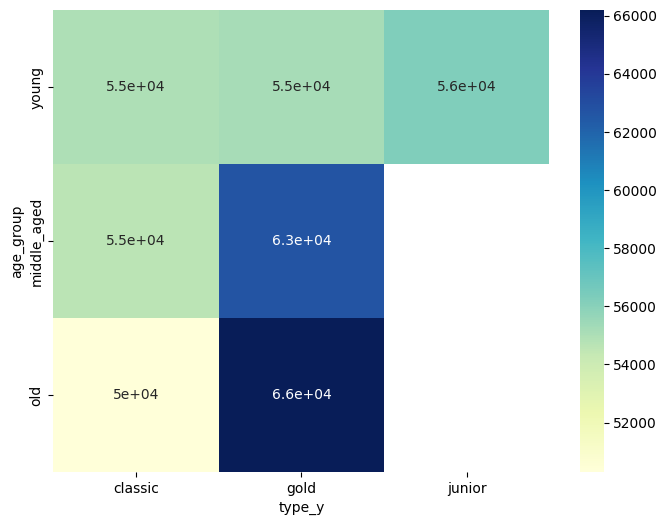

In [40]:
pivot_table = pd.crosstab(df_mergedxx["age_group"],df_mergedxx["type_y"],values=df_mergedxx['balance'],aggfunc="mean")

# Generate the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")

<Axes: xlabel='type_y', ylabel='age_group'>

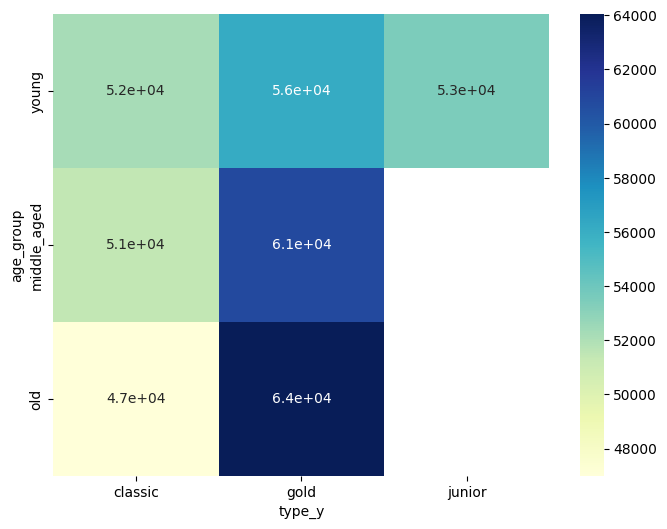

In [41]:
pivot_table1 = pd.crosstab(df_mergedxx["age_group"],df_mergedxx["type_y"],values=df_mergedxx['balance'],aggfunc="median")

# Generate the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table1, annot=True, cmap="YlGnBu")

In [10]:
df_merged = loan.merge(account, on='account_id', how='inner') \
                   .merge(disposition, on='account_id', how='inner') \
                   .merge(client, on='client_id', how='inner') \
                   .merge(demographic, left_on='district_id_x',right_on="dis_id",how='inner') \
                   .merge(card, on='disp_id', how='inner') \
                   .merge(order, on='account_id', how='inner') \
                   .merge(transaction, on='account_id', how='inner') 

                    


In [48]:
df_mergedxxy=df_mergedxx.merge(demographic, left_on='district_id_x',right_on="dis_id",how='inner').merge(order, on='account_id', how='inner')

In [50]:
df_mergedxxy.isnull().sum()

client_id                                  0
birth_date                                 0
district_id_x                              0
Gender                                     0
disp_id                                    0
account_id                                 0
type_x                                     0
card_id                                    0
type_y                                     0
issued                                     0
Age                                        0
district_id_y                              0
frequency                                  0
date_x                                     0
Unnamed: 0_x                               0
trans_id                                   0
date_y                                     0
type                                       0
operation                                  0
amount_x                                   0
balance                                    0
k_symbol                                   0
bank      

In [49]:
df_mergedxxy.to_csv("lmerged.csv")

In [11]:
df_merged.isnull().sum()

loan_id                                    0
account_id                                 0
date_x                                     0
amount_x                                   0
duration                                   0
payments                                   0
status                                     0
district_id_x                              0
frequency                                  0
date_y                                     0
disp_id                                    0
client_id                                  0
type_x                                     0
birth_date                                 0
district_id_y                              0
Gender                                     0
dis_id                                     0
dis_name                                   0
region                                     0
No of inhabitants                          0
no/Municipalities/inhabitants<499          0
no/Municipalities/inhabitants/500-1999     0
no/Municip

In [14]:
loan['account_id'].shape

(682,)

df_merged.to_csv("merged.csv")

import pandas as pd
from sqlalchemy import create_engine

# Define the connection string
username = 'root'
password = 'Kapil@1234567890'
port="3306"
host = 'localhost'  # e.g., 'localhost'
database = 'credit_card_loan1'

password = urllib.parse.quote_plus(password)

# Create an engine
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')


# Insert DataFrame into SQL table
# `if_exists='append'` to append the data, `index=False` to avoid adding DataFrame index as a column
df_merged.to_sql('merged', con=engine, if_exists='append', index=False, chunksize=1000)

print("Data inserted successfully")

